In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn import preprocessing
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV
from collections import defaultdict  # For word frequency
pd.options.mode.chained_assignment = None
import re
import nltk
import seaborn as sn
from sklearn.model_selection import cross_val_predict
import pickle
import string
import heapq
from sklearn import svm
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/liushikai/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Import Data

In [3]:
## import testing data set
## remove emotion guilt and shame
data = pd.read_excel("DATA.xlsx",index_col=0)
data = data[['Field1','SIT']]
data = data.reset_index()
data.columns= ['ID','emotion', 'sentence']
data = data[data.emotion  != 'shame']
data = data[data.emotion  != 'guilt']
data = data.sample(frac=1,random_state=13579)

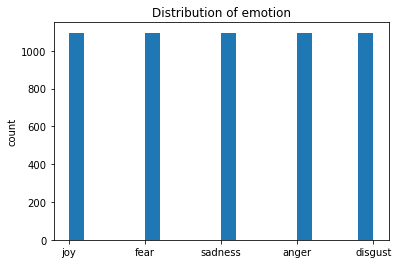

In [4]:
emotions = data.emotion.tolist()
plt.hist(emotions, bins=20,rwidth=1)
plt.ylabel('count')
#plt.xlabel('rating')
plt.title('Distribution of emotion')
plt.show()

# Clean Data

In [5]:
# data cleaning functions
def clean_numbers(x):
    '''
    replace number with # sign
    '''
    x = re.sub('[0-9]{3,}', '### ', x)
    x = re.sub('[0-9]{2}', ' ## ', x)
    return x

def clean_punc(x):
    '''
    replace punctuation with space
    '''
    x = str(x)
    for punct in string.punctuation:
        x = x.replace(punct, ' ')
    return x

def preprocess(df, feature):
    '''
    preprocess the feature column in df
    remove punctuations, change to lowercase, repalce numbers with #
    fill with 'None' if the string is empty
    '''
    df[feature] = df[feature].map(clean_punc)
    df[feature] = df[feature].str.lower()
    df[feature] = df[feature].map(clean_numbers)
    df[feature] = df[feature].map(lambda x: 'None' if x == '' else x)
    return df

# preprocess the data
data = preprocess(data, 'sentence')

In [6]:

corpus = []
for sentence in data['sentence'].tolist():
    word_list = sentence.split()
    corpus.append(word_list)


# Glove 6B

In [8]:
import torch
import torchtext
glove = torchtext.vocab.GloVe(name="6B", dim=50)   

## remove word that does not in our trained embedding model
with open('ave_dict', 'rb') as rf:
    ave_model = pickle.load(rf)

vector_glove = []
for i in range(len(corpus)):
    temp = glove['']
    for j in range(len(corpus[i])):
        if  corpus[i][j] in ave_model.keys():
            temp = temp + glove[corpus[i][j]]
        else:
            next
    vector_glove.append(temp/len(corpus[i]))
vec_sentence_glove = np.vstack( vector_glove )  

In [9]:
### SVM + Cross Validation
np.random.seed(123) 
cv_results_glove = cross_validate(SVC(C= 0.1), vec_sentence_glove, data.emotion.values, cv=5, scoring  = 'f1_macro', return_train_score = True)
cv_results_glove     ######## glove 6b dim=50

{'fit_time': array([2.62730908, 2.42783833, 2.21573901, 2.41039991, 2.33338714]),
 'score_time': array([0.32874107, 0.6191349 , 0.319767  , 0.33270097, 0.31390715]),
 'test_score': array([0.42783204, 0.45009478, 0.44881718, 0.42317198, 0.39145788]),
 'train_score': array([0.43119949, 0.43381525, 0.42838386, 0.43860834, 0.44503336])}

In [10]:
(0.42783204 + 0.45009478 +0.44881718 + 0.42317198 + 0.39145788)/5

0.4282747720000001

# Average_Model

In [11]:
with open('ave_dict', 'rb') as rf:
    ave_model = pickle.load(rf)

vector_ave = []
for i in range(len(corpus)):
    temp = np.zeros(64)
    for j in range(len(corpus[i])):
        try:
            temp = temp + ave_model[corpus[i][j]] 
        except:
            next
    vector_ave.append(temp/len(corpus[i]))
     
vec_sentence_ave = np.vstack(vector_ave)  

In [12]:
np.random.seed(123) 
cv_results_ave = cross_validate(SVC(C=0.1), vec_sentence_ave, data.emotion.values, cv=5, scoring  = 'f1_macro', return_train_score = True)
cv_results_ave

{'fit_time': array([3.05270696, 2.97786331, 2.87062597, 2.77540898, 3.29351926]),
 'score_time': array([0.37473512, 0.43252778, 0.38529205, 0.49606395, 0.61251664]),
 'test_score': array([0.41225029, 0.40077189, 0.43905625, 0.41390216, 0.38462274]),
 'train_score': array([0.4347982 , 0.43791312, 0.42767369, 0.43622596, 0.44069711])}

In [13]:
(0.41225029+ 0.40077189+ 0.43905625+ 0.41390216+ 0.38462274)/5

0.4101206660000001

# LSTM_Model

In [14]:
with open('lstm_dict', 'rb') as rf:
    lstm_model = pickle.load(rf)
    
vector_lstm = []
for i in range(len(corpus)):
    temp = np.zeros(64)
    for j in range(len(corpus[i])):
        try:
            temp = temp + lstm_model[corpus[i][j]] 
        except:
            next
    vector_lstm.append(temp/len(corpus[i]))

vec_sentence_lstm = np.vstack(vector_lstm)  

In [15]:
np.random.seed(123) 
cv_results_lstm = cross_validate(SVC(C=0.1), vec_sentence_lstm, data.emotion.values, cv=5, scoring  = 'f1_macro', return_train_score = True)
cv_results_lstm

{'fit_time': array([3.02309418, 2.80074096, 2.5853529 , 2.56723094, 2.54965711]),
 'score_time': array([0.42027497, 0.44073701, 0.387465  , 0.38802099, 0.38892007]),
 'test_score': array([0.41640686, 0.40809345, 0.43642185, 0.38594144, 0.38600218]),
 'train_score': array([0.43881765, 0.43865636, 0.43803834, 0.44047815, 0.44167266])}

In [16]:
(0.41640686+ 0.40809345+ 0.43642185+ 0.38594144+ 0.38600218)/5

0.406573156

# Attention Model

In [17]:
with open('att_dict', 'rb') as rf:
    att_model = pickle.load(rf)
    
vector_att = []
for i in range(len(corpus)):
    temp = np.zeros(64)
    for j in range(len(corpus[i])):
        try:
            temp = temp + att_model[corpus[i][j]]  ### mtatt
        except:
            next
    vector_att.append(temp/len(corpus[i]))
    
vec_sentence_att = np.vstack(vector_att)  

In [18]:
np.random.seed(123) 
cv_results_att = cross_validate(SVC(C=0.1), vec_sentence_att, data.emotion.values, cv=5, scoring  = 'f1_macro', return_train_score = True)
cv_results_att

{'fit_time': array([2.53155684, 2.47385192, 2.63676119, 2.68796229, 2.55728507]),
 'score_time': array([0.38498926, 0.38817406, 0.39890623, 0.41019583, 0.39029408]),
 'test_score': array([0.44504077, 0.43123989, 0.43314835, 0.4302301 , 0.40294296]),
 'train_score': array([0.44581918, 0.45588631, 0.45361998, 0.44977537, 0.45637001])}

In [19]:
(0.44504077+ 0.43123989+ 0.43314835+ 0.4302301 + 0.40294296)/5

0.42852041399999996

# MTATT

In [20]:
with open('mtatt_dict', 'rb') as rf:
    mtatt_model = pickle.load(rf)
    
vector_mtatt = []
for i in range(len(corpus)):
    temp = np.zeros(64)
    for j in range(len(corpus[i])):
        try:
            temp = temp + mtatt_model[corpus[i][j]]  ### mtatt
        except:
            next
    vector_mtatt.append(temp/len(corpus[i]))
    
vec_sentence_mtatt = np.vstack(vector_mtatt)  

In [21]:
### SVM + Cross Validation
np.random.seed(123) 
cv_results_mtatt = cross_validate(SVC(C= 0.1), vec_sentence_mtatt, data.emotion.values, cv=5, scoring  = 'f1_macro', return_train_score = True)
cv_results_mtatt

{'fit_time': array([2.7733078 , 2.83496284, 2.90859294, 3.26106691, 2.87554812]),
 'score_time': array([0.42696905, 0.43319917, 0.39283609, 0.39533305, 0.38783693]),
 'test_score': array([0.43708693, 0.40842472, 0.45072013, 0.43738794, 0.41987863]),
 'train_score': array([0.46143795, 0.4693561 , 0.46330916, 0.45718138, 0.46631948])}

In [22]:
(0.43708693+ 0.40842472+ 0.45072013+ 0.43738794+ 0.41987863)/5

0.43069967

Text(0.5, 1.0, 'MTATT confusion matrix')

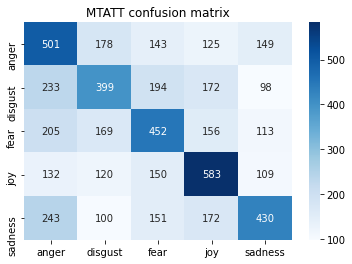

In [23]:
## MTATT
y_pred_mtatt = cross_val_predict(SVC(C=0.1), vec_sentence_mtatt, data.emotion.values, cv=5)
conf_mat_mtatt = pd.DataFrame(confusion_matrix(data.emotion.values, y_pred_mtatt), columns=['anger','disgust','fear','joy', 'sadness'], index=['anger','disgust','fear','joy', 'sadness'])

ax = sn.heatmap(conf_mat_mtatt, annot=True, cmap="Blues", fmt='g')
ax.set_title('MTATT confusion matrix')

In [24]:
a =  y_pred_mtatt
unique, counts = np.unique(a, return_counts=True)
dict(zip(unique, counts))

{'anger': 1314, 'disgust': 966, 'fear': 1090, 'joy': 1208, 'sadness': 899}

Text(0.5, 1.0, 'Glove confusion matrix')

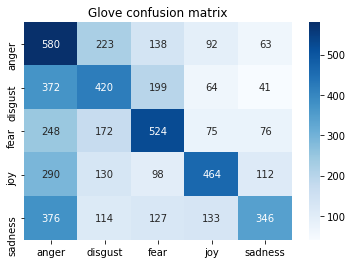

In [25]:
## GLOVE 
y_pred_glove = cross_val_predict(SVC(C=0.1), vec_sentence_glove, data.emotion.values, cv=5)
conf_mat_glove = confusion_matrix(data.emotion.values, y_pred_glove)

y_pred_mtatt = cross_val_predict(SVC(C=0.1), vec_sentence_mtatt, data.emotion.values, cv=5)
conf_mat_mtatt = pd.DataFrame(confusion_matrix(data.emotion.values, y_pred_glove), columns=['anger','disgust','fear','joy', 'sadness'], index=['anger','disgust','fear','joy', 'sadness'])

ax = sn.heatmap(conf_mat_mtatt, annot=True, cmap="Blues", fmt='g')
ax.set_title('Glove confusion matrix')

In [26]:
a =  y_pred_glove
unique, counts = np.unique(a, return_counts=True)
dict(zip(unique, counts))

{'anger': 1866, 'disgust': 1059, 'fear': 1086, 'joy': 828, 'sadness': 638}

# Emotion Similarity using NRC lexicon

In [27]:
filepath = "NRC-emotion-lexicon-wordlevel-alphabetized-v0.92.txt"
emolex_df = pd.read_csv(filepath,  names=["word", "emotion", "association"], skiprows=45, sep='\t', keep_default_na=False)
emolex_df.head(12)

emolex_words = emolex_df.pivot(index='word', columns='emotion', values='association').reset_index()

In [28]:
new_emolex = emolex_words.drop('positive', axis=1).drop('negative', axis=1).drop('trust', axis=1).drop('surprise', axis=1).drop('anticipation', axis=1)

In [29]:
df = new_emolex.loc[new_emolex['anger'] + new_emolex['disgust'] + new_emolex['joy'] + new_emolex['fear']+ new_emolex['sadness'] != 0]

Since in the lexicon, one word has multiple emotion, then I delete these word has mutiple emotion

But this is bad, we only has hundreds word in common

In [30]:
df = df.loc[df['anger'] + df['disgust'] + df['joy'] + df['fear']+ df['sadness'] == 1]

Step 1: find common word in lexicon and our embedding

In [31]:
word_nrc = df['word'].tolist()

In [32]:
word_embed=  np.intersect1d( list(att_model.keys()),  list(mtatt_model.keys()))

In [33]:
common_word = np.intersect1d(word_nrc, word_embed)  ## size = 2674

Step 2: Calculate Cosine Similarity between each word

In [34]:
######### the embedding vector by Glove 
vec_word = []
for i in range(len(common_word)):
    vec_word.append(glove[common_word[i]])

vec_temp = []
for i in range(len(vec_word)):
    temp = vec_word[i].numpy()
    vec_temp.append(temp)

from sklearn.metrics.pairwise import cosine_similarity
word_sim_glove = cosine_similarity(vec_temp, vec_temp)   ## cosine similarity matrix

In [35]:
######### the embedding vector by Ave 
vec_word = []
for i in range(len(common_word)):
    vec_word.append(ave_model[common_word[i]])
    

word_sim_ave = cosine_similarity(vec_word, vec_word)   ## cosine similarity matrix

In [36]:
######### the embedding vector by LSTM 
vec_word = []
for i in range(len(common_word)):
    vec_word.append(lstm_model[common_word[i]])
    
word_sim_lstm = cosine_similarity(vec_word, vec_word)   ## cosine similarity matrix

In [37]:
######### the embedding vector by Attention 
vec_word = []
for i in range(len(common_word)):
    vec_word.append(att_model[common_word[i]])
    
word_sim_att = cosine_similarity(vec_word, vec_word)   ## cosine similarity matrix

In [38]:
######### the embedding vector by MTATT 
vec_word = []
for i in range(len(common_word)):
    vec_word.append(mtatt_model[common_word[i]])
    
word_sim_mtatt = cosine_similarity(vec_word, vec_word)   ## cosine similarity matrix

Calcaute the Accuracy,

In [39]:
## glove

numerator = 0 

for i in range(len(common_word)):
    temp =df.loc[df['word'] == common_word[i]]
    emo =temp.columns[temp.isin([1]).all()].tolist()[0]
    a = word_sim_glove[i]
    indic = heapq.nlargest(10, range(len(a)), a.take)     ### here to change the paramter "N"
    for j in range(len(indic)):
        temp2 =df.loc[df['word'] == common_word[indic[j]]]
        emo2 =temp2.columns[temp2.isin([1]).all()].tolist()[0]
        if emo ==emo2:
            numerator = numerator + 1
numerator

2123

In [40]:
### AVE
numerator = 0 

for i in range(len(common_word)):
    temp =df.loc[df['word'] == common_word[i]]
    emo =temp.columns[temp.isin([1]).all()].tolist()[0]
    a = word_sim_ave[i]
    indic = heapq.nlargest(10, range(len(a)), a.take)
    for j in range(len(indic)):
        temp2 =df.loc[df['word'] == common_word[indic[j]]]
        emo2 =temp2.columns[temp2.isin([1]).all()].tolist()[0]
        if emo ==emo2:
            numerator = numerator + 1
numerator 

1854

In [41]:
###  LSTM
numerator = 0 

for i in range(len(common_word)):
    temp =df.loc[df['word'] == common_word[i]]
    emo =temp.columns[temp.isin([1]).all()].tolist()[0]
    a = word_sim_lstm[i]
    indic = heapq.nlargest(10, range(len(a)), a.take)
    for j in range(len(indic)):
        temp2 =df.loc[df['word'] == common_word[indic[j]]]
        emo2 =temp2.columns[temp2.isin([1]).all()].tolist()[0]
        if emo ==emo2:
            numerator = numerator + 1
numerator 

1779

In [42]:
### Attention
numerator = 0 

for i in range(len(common_word)):
    temp =df.loc[df['word'] == common_word[i]]
    emo =temp.columns[temp.isin([1]).all()].tolist()[0]
    a = word_sim_att[i]
    indic = heapq.nlargest(10, range(len(a)), a.take)
    for j in range(len(indic)):
        temp2 =df.loc[df['word'] == common_word[indic[j]]]
        emo2 =temp2.columns[temp2.isin([1]).all()].tolist()[0]
        if emo ==emo2:
            numerator = numerator + 1
numerator 

1731

In [43]:
###  MTATT
numerator = 0 

for i in range(len(common_word)):
    temp =df.loc[df['word'] == common_word[i]]
    emo =temp.columns[temp.isin([1]).all()].tolist()[0]
    a = word_sim_mtatt[i]
    indic = heapq.nlargest(10, range(len(a)), a.take)
    for j in range(len(indic)):
        temp2 =df.loc[df['word'] == common_word[indic[j]]]
        emo2 =temp2.columns[temp2.isin([1]).all()].tolist()[0]
        if emo ==emo2:
            numerator = numerator + 1
numerator 

1715

In [44]:
len(common_word)

382